In [1]:
import os
import numpy as np
import keras
from keras.applications import NASNetLarge
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import optimizers
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dropout
from tensorflow.keras import backend as K
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import csv
import pandas as pd

Using TensorFlow backend.
C:\Users\idong\Anaconda3\envs\tens_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\idong\Anaconda3\envs\tens_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\idong\Anaconda3\envs\tens_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\idong\Anaconda3\envs\tens_gpu

In [2]:
base_dir = r'D:\dataset\dental\data'

patient_data_1 = np.load(base_dir + '\\1_dataset\\data_KNU_Diorco_so_imgs_p.npy')
label_csv_1= open(base_dir + '\\1_dataset\\data_KNU_Diorco_so_img_labels_pre.csv', 'r')
label_1 = csv.reader(label_csv_1)


patient_data_2 = np.load(base_dir + '\\2_dataset\\data_KNU_Diorco_so_imgs_02.npy')
label_csv_2= open(base_dir + '\\2_dataset\\data_KNU_Diorco_so_img_labels_02.csv', 'r')
label_2 = csv.reader(label_csv_2)

KeyboardInterrupt: 

In [3]:
del label_csv_1
del label_csv_2

NameError: name 'label_csv_1' is not defined

## label Preprocessing

   - 6채널을 3채널로 분리함
   - 두개의 label set을 하나로 합쳐줌
   - 합친 label 저장

In [4]:
right_label_1 = []
left_label_1 = []

for line in label_1:
    right_label_1.append(line[3])
    left_label_1.append(line[4])

right_label_1 = right_label_1[1:]
left_label_1 = left_label_1[1:]

right_label_1 = list(map(int, right_label_1))
left_label_1 = list(map(int, left_label_1))

right_label_1 = np.array(right_label_1)
left_label_1 = np.array(left_label_1)

np.save(base_dir + '\\1_dataset\\right_label_1.npy', right_label_1)
np.save(base_dir + '\\1_dataset\\left_label_1.npy', left_label_1)

In [5]:
right_label_2 = []
left_label_2 = []

for line in label_2:
    right_label_2.append(line[3])
    left_label_2.append(line[4])

right_label_2 = right_label_2[1:]
left_label_2 = left_label_2[1:]

right_label_2 = list(map(int, right_label_2))
left_label_2 = list(map(int, left_label_2))

right_label_2 = np.array(right_label_2)
left_label_2 = np.array(left_label_2)

np.save(base_dir + '\\2_dataset\\right_label_2.npy', right_label_2)
np.save(base_dir + '\\2_dataset\\left_label_2.npy', left_label_2)

###  두개의 label set을 합쳐줌

In [6]:
patient_labels = []
patient_labels_1 = []
patient_labels_2 = []

patient_labels_1.extend(left_label_1)
patient_labels_1.extend(right_label_1)
patient_labels.extend(patient_labels_1)

patient_labels_2.extend(left_label_2)
patient_labels_2.extend(right_label_2)
patient_labels.extend(patient_labels_2)

patient_labels = np.array(patient_labels)

del patient_labels_1
del patient_labels_2

### 합친 label 저장

In [7]:
np.save(base_dir + '\\total_data\\total_labels.npy', patient_labels)

## Data Preporcessing

   - right와 left 데이터를 나눠줌
   - data를 저장해줌

In [11]:
patient_data = np.concatenate((patient_data_1, patient_data_2), axis = 0)

In [12]:
patient_data.shape

(1629, 480, 784, 6)

### right와 left 데이터를 나눠줌

In [13]:
right = patient_data[:,:,:, 0:3]
left = patient_data[:,:,:, 3:7]

tmp_patient_data = []
tmp_patient_data.extend(left)
tmp_patient_data.extend(right)
patient_data = np.array(tmp_patient_data)

In [14]:
del tmp_patient_data
del patient_data_1
del patient_data_2

### data를 저장해줌

In [18]:
np.save(base_dir + r'\\total_data\\total_data.npy', patient_data)

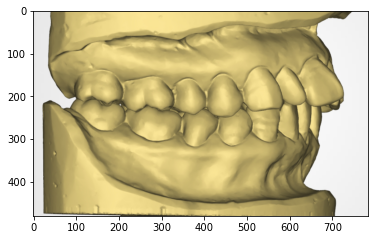

In [20]:
plt.imshow(patient_data[0])

## data 준비과정

In [2]:
base_dir = r'D:\dataset\dental\data\total_data'
patient_data = np.load(base_dir + '\\total_data.npy')
patient_labels = np.load(base_dir + '\\total_labels.npy')

## data reshape

In [3]:
re_patient_data = []

for i in range(len(patient_data)):
    re_patient_data.append(cv2.resize(patient_data[i], (331, 331), interpolation=cv2.INTER_AREA))
re_patient_data = np.array(re_patient_data)

In [4]:
re_patient_data.shape

(3258, 331, 331, 3)

In [5]:
patient_data = re_patient_data
del re_patient_data

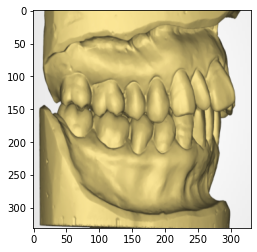

In [6]:
plt.imshow(patient_data[0])

In [7]:
train_data, test_data, train_label, test_label= train_test_split(patient_data, patient_labels, test_size = 0.2, random_state = 33, shuffle = True)
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size = 0.2, random_state = 33, shuffle = True)

In [8]:
one_hot_train_labels = to_categorical(train_label - 1)
one_hot_validation_labels = to_categorical(val_label  - 1)
one_hot_test_labels = to_categorical(test_label - 1)

In [9]:
train_data = train_data.astype(np.float32) / 127.5 - 1
test_data = test_data.astype(np.float32) / 127.5 - 1
val_data = val_data.astype(np.float32) / 127.5 - 1

## Data Augmentation

In [10]:
datagen = ImageDataGenerator(rotation_range = 10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=False,
                                  vertical_flip=False,
                                  fill_mode='nearest'
                                 )

In [11]:
datagen = ImageDataGenerator(zca_whitening=True)

C:\Users\idong\Anaconda3\envs\tens_gpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


# 2. callback함수 정의
* callback_clf 학습 시킬 때
   - modelcheckpoint 사용하여 model을 저장
   
        -> monitor = 'val_acc'
        
        -> save_best_only = False
        
        -> period = 1
        
   - Earlystopping 사용하여 acc가 20epoch동안 향상되지 않으면 stop
   
        -> monitor = 'acc'
        
        -> patience = 19
        
        -> mode = max

In [11]:
callbacks_list_clf = [
    keras.callbacks.EarlyStopping(
        monitor='acc',
        patience = 24,
        mode = max
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='dental_NASNetLarge_clf.h5',
        monitor='val_acc',
        save_best_only=False,
        period = 1
    ) 
]
'''keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.1,
    patience = 10'''

C:\Users\idong\Anaconda3\envs\tens_gpu\lib\site-packages\keras\callbacks\callbacks.py:788: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


"keras.callbacks.ReduceLROnPlateau(\n    monitor = 'val_loss',\n    factor = 0.1,\n    patience = 10"

## 3. Model

In [12]:
inp = layers.Input(shape=(331, 331, 3))

base_model = NASNetLarge(
    input_shape=(331, 331, 3),
    input_tensor=inp,
    include_top=False,
    weights="imagenet",
)

In [13]:
#conv_base동결
base_model.trainable = False

flat = layers.Flatten()
dropped = layers.Dropout(0.5)
global_average_layer = layers.GlobalAveragePooling2D()

dense1 = layers.Dense(128, activation='relu', name='dense_1')
dense2 = layers.Dense(128, activation='relu', name='dense_2')
prediction = layers.Dense(3, activation='softmax', name='prediction')

In [14]:
base_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [15]:
activation_1040 = base_model.get_layer('activation_260')
x = global_average_layer(activation_1040.output)
#x = dense1(x)
#x = dropped(x)
x = dense2(x)
x = dropped(x)
x = prediction(x)

model = models.Model(inputs = inp, outputs = x)

In [16]:
model.compile(optimizer=optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_data, one_hot_train_labels,
    batch_size = 20,
    epochs = 50,
    callbacks= callbacks_list_clf,
    validation_data=(val_data, one_hot_validation_labels)
)


Train on 2084 samples, validate on 522 samples
Epoch 1/50


In [ ]:
history2 = model.fit_generator(
    datagen.flow(train_data, one_hot_train_labels, batch_size = 25),
    steps_per_epoch=170,
    epochs = 50,
    callbacks= callbacks_list_clf,
    validation_data=(val_data, one_hot_validation_labels)
)

C:\Users\idong\Anaconda3\envs\tens_gpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\idong\Anaconda3\envs\tens_gpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
